In [1]:
import os
import sys
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

path_to_this_notebook = os.path.abspath('.')
path_to_project = path_to_this_notebook[:path_to_this_notebook.find('note')]
sys.path.append(path_to_project)

%load_ext autoreload
%autoreload 2

In [2]:
from src.td3_code.agents.td3 import TD3Agent
from src.td3_code.memory.trajectory_replay_buffer import TrajectoryMemoryBuffer
from src.td3_code.memory.transition_replay_buffer import TransitionMemoryBuffer
from src.td3_code.runners.runner import Runner

USING DEVICE cpu


In [3]:
import numpy as np 
import gym

env = gym.make("Pendulum-v1")

In [4]:
env.action_space, env.observation_space

(Box([-2.], [2.], (1,), float32),
 Box([-1. -1. -8.], [1. 1. 8.], (3,), float32))

In [4]:
observation_dim = env.observation_space.shape[0]
action_dim =  env.action_space.shape[0]
max_action_value = env.action_space.high[0]
scheme = {'observations': env.observation_space.shape, 
          'observations_next': env.observation_space.shape,
          'actions': env.action_space.shape,
          'done': (1, ), 'reward': (1, ), 'reset_mask': (1, )}

### Normal transitions

In [14]:
memory_trans = TransitionMemoryBuffer(scheme=scheme, max_size=int(1e6), min_size_to_sample=2000, 
                                      sample_during_episode=True)

lstm_dims_list = []
hidden_dims_list = [64, 64]

agent = TD3Agent(observation_dim, action_dim, max_action_value, lstm_dims_list, hidden_dims_list,
                 actor_lr=8e-4, critic_lr=8e-4,  discount=0.99, tau=0.005,
                 policy_noise=0.2, noise_clip=0.5, policy_update_freq=2)

runner = Runner(env, memory_trans, agent)

In [15]:
batch_size = 16
n_eps = 201
print_each = 50
test_each = 50
n_test_episodes = 10

keys_to_print = ['reward']
train_results = defaultdict(list)
test_results = defaultdict(list)

for ep in range(1, n_eps):
    episode_results = runner.run(train=True, save_to_memory=True, train_bath_size=batch_size)

    for key, val in episode_results.items():
        train_results[key].append(val)
    
    if ep % print_each == 0:
        print('Training episode %d    ' % ep)

        for key in keys_to_print:
            print('    %s=%.2f' % (key, np.mean(train_results[key][-print_each:])))
            
        print()
        
    if ep % test_each == 0:
        current_test_results = defaultdict(list)

        for test_ep in range(n_test_episodes):
            episode_results = runner.run(train=False, save_to_memory=False)

            for key, val in episode_results.items():
                current_test_results[key].append(val)

        current_test_results = {key: np.mean(val) for key, val in current_test_results.items()}

        for key, val in current_test_results.items():
            test_results[key].append(val)
            
        print('Test run after episode %d:' % ep)

        for key in keys_to_print:
            print('    %s=%.2f' % (key, current_test_results[key]))

        print()
        

            EP1
            EP2
            EP3
            EP4
            EP5
            EP6
            EP7
            EP8
            EP9
            EP10
            EP11
            EP12
            EP13
            EP14
            EP15
            EP16
            EP17
            EP18
            EP19
            EP20
            EP21
            EP22
            EP23
            EP24
            EP25
            EP26
            EP27
            EP28
            EP29
            EP30
            EP31
            EP32
            EP33
            EP34
            EP35
            EP36
            EP37
            EP38
            EP39
            EP40
            EP41
            EP42
            EP43
            EP44
            EP45
            EP46
            EP47
            EP48
            EP49
            EP50
Training episode 50    
    reward=-1305.63

Test run after episode 50:
    reward=-1261.79

            EP51
            EP52
            EP53
            EP5

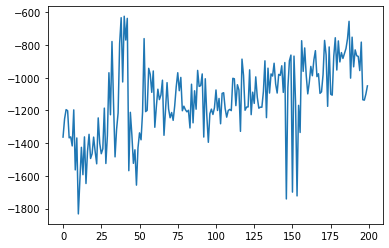

In [16]:
plt.plot(train_results['reward'])

### Transitions from the Traj buffer

In [11]:
memory_traj_trans = TrajectoryMemoryBuffer(scheme=scheme, max_size=int(1e6/200), min_size_to_sample=10, 
                                          use_transitions=True, sample_during_episode=True)

lstm_dims_list = []
hidden_dims_list = [64, 64]

agent = TD3Agent(observation_dim, action_dim, max_action_value, lstm_dims_list, hidden_dims_list,
                 actor_lr=8e-4, critic_lr=8e-4,  discount=0.99, tau=0.005,
                 policy_noise=0.2, noise_clip=0.5, policy_update_freq=2)

runner = Runner(env, memory_traj_trans, agent)

batch_size = 16

In [12]:
n_eps = 501
print_each = 50
test_each = 50
n_test_episodes = 10

keys_to_print = ['reward']
train_results = defaultdict(list)
test_results = defaultdict(list)

for ep in range(1, n_eps):
    #print('            EP%d' % ep)
    episode_results = runner.run(train=True, save_to_memory=True, train_bath_size=batch_size)
    for key, val in episode_results.items():
        train_results[key].append(val)
    
    if ep % print_each == 0:
        print('Training episode %d    ' % ep)
        for key in keys_to_print:
            print('    %s=%.2f' % (key, np.mean(train_results[key][-print_each:])))
        print()
        
    if ep % test_each == 0:
        current_test_results = defaultdict(list)
        for test_ep in range(n_test_episodes):
            episode_results = runner.run(train=False, save_to_memory=False)
            for key, val in episode_results.items():
                current_test_results[key].append(val)
        current_test_results = {key: np.mean(val) for key, val in current_test_results.items()}
        for key, val in current_test_results.items():
            test_results[key].append(val)
            
        print('Test run after episode %d:' % ep)
        for key in keys_to_print:
            print('    %s=%.2f' % (key, current_test_results[key]))
        print()
        

/Users/douwe/Projects/temp/RL-EVCP/src/td3_code/runners/runner.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rewards = torch.tensor(rewards, dtype=torch.float32).to(DEVICE)


Training episode 50    
    reward=-1299.94

Test run after episode 50:
    reward=-1092.90

Training episode 100    
    reward=-984.32

Test run after episode 100:
    reward=-1019.17

Training episode 150    
    reward=-787.65

Test run after episode 150:
    reward=-759.41

Training episode 200    
    reward=-356.52

Test run after episode 200:
    reward=-159.81

Training episode 250    
    reward=-191.79

Test run after episode 250:
    reward=-199.83

Training episode 300    
    reward=-151.24

Test run after episode 300:
    reward=-159.12

Training episode 350    
    reward=-150.20

Test run after episode 350:
    reward=-146.14

Training episode 400    
    reward=-159.21

Test run after episode 400:
    reward=-152.54

Training episode 450    
    reward=-162.34

Test run after episode 450:
    reward=-188.70

Training episode 500    
    reward=-126.76

Test run after episode 500:
    reward=-155.33



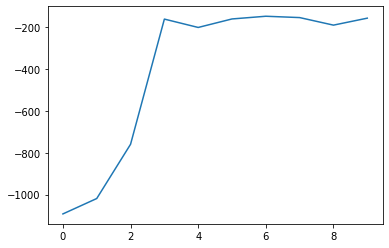

In [13]:
plt.plot(test_results['reward'])

###  Transitions from the Traj buffer, learning after episode

In [ ]:
memory_trans = TransitionMemoryBuffer(scheme=scheme, max_size=int(1e6), min_size_to_sample=2000, 
                                      sample_during_episode=True)


memory_traj = TrajectoryMemoryBuffer(scheme=scheme, max_size=int(1e6/200), min_size_to_sample=10, 
                                     use_transitions=False, sample_during_episode=False)

memory_traj_trans = TrajectoryMemoryBuffer(scheme=scheme, max_size=int(1e6/200), min_size_to_sample=10, 
                                          use_transitions=True, sample_during_episode=False)



lstm_dims_list = []
hidden_dims_list = [64, 64]

agent = TD3Agent(observation_dim, action_dim, max_action_value, lstm_dims_list, hidden_dims_list,
                 actor_lr=8e-4, critic_lr=8e-4,  discount=0.99, tau=0.05,
                 policy_noise=0.2, noise_clip=0.5, policy_update_freq=2)

runner = Runner(env, memory_traj_trans, agent)

batch_size =  512

In [ ]:
n_eps = 2001
print_each = 50
test_each = 50
n_test_episodes = 10

keys_to_print = ['reward']
train_results = defaultdict(list)
test_results = defaultdict(list)

for ep in range(1, n_eps):
    #print('            EP%d' % ep)
    episode_results = runner.run(train=True, save_to_memory=True, train_bath_size=batch_size)
    for key, val in episode_results.items():
        train_results[key].append(val)
    
    if ep % print_each == 0:
        print('Training episode %d    ' % ep)
        for key in keys_to_print:
            print('    %s=%.2f' % (key, np.mean(train_results[key][-print_each:])))
        print()
        
    if ep % test_each == 0:
        current_test_results = defaultdict(list)
        for test_ep in range(n_test_episodes):
            episode_results = runner.run(train=False, save_to_memory=False)
            for key, val in episode_results.items():
                current_test_results[key].append(val)
        current_test_results = {key: np.mean(val) for key, val in current_test_results.items()}
        for key, val in current_test_results.items():
            test_results[key].append(val)
            
        print('Test run after episode %d:' % ep)
        for key in keys_to_print:
            print('    %s=%.2f' % (key, current_test_results[key]))
        print()
        

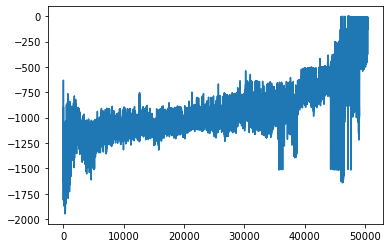

In [ ]:
plt.plot(train_results['reward'])

###  Trajectories from the Traj buffer, learning after episode

In [ ]:
memory_trans = TransitionMemoryBuffer(scheme=scheme, max_size=int(1e6), min_size_to_sample=2000, 
                                      sample_during_episode=True)


memory_traj = TrajectoryMemoryBuffer(scheme=scheme, max_size=int(1e6/200), min_size_to_sample=10, 
                                     use_transitions=False, sample_during_episode=True)

memory_traj_trans = TrajectoryMemoryBuffer(scheme=scheme, max_size=int(1e6/200), min_size_to_sample=10, 
                                          use_transitions=True, sample_during_episode=False)



lstm_dims_list = [64]
hidden_dims_list = [64]

agent = TD3Agent(observation_dim, action_dim, max_action_value, lstm_dims_list, hidden_dims_list,
                 actor_lr=8e-4, critic_lr=8e-4,  discount=0.99, tau=0.05,
                 policy_noise=0.2, noise_clip=0.5, policy_update_freq=2)

runner = Runner(env, memory_traj, agent)

batch_size =  1

In [ ]:
n_eps = 2001
print_each = 5
test_each = 50
n_test_episodes = 10

keys_to_print = ['reward']
train_results = defaultdict(list)
test_results = defaultdict(list)

for ep in range(1, n_eps):
    #print('            EP%d' % ep)
    episode_results = runner.run(train=True, save_to_memory=True, train_bath_size=batch_size)
    for key, val in episode_results.items():
        train_results[key].append(val)
    
    if ep % print_each == 0:
        print('Training episode %d    ' % ep)
        for key in keys_to_print:
            print('    %s=%.2f' % (key, np.mean(train_results[key][-print_each:])))
        print()
        
    if ep % test_each == 0:
        current_test_results = defaultdict(list)
        for test_ep in range(n_test_episodes):
            episode_results = runner.run(train=False, save_to_memory=False)
            for key, val in episode_results.items():
                current_test_results[key].append(val)
        current_test_results = {key: np.mean(val) for key, val in current_test_results.items()}
        for key, val in current_test_results.items():
            test_results[key].append(val)
            
        print('Test run after episode %d:' % ep)
        for key in keys_to_print:
            print('    %s=%.2f' % (key, current_test_results[key]))
        print()
        

In [ ]:
plt.plot(train_results['reward'])

In [ ]:
plt.plot(train_results['reward'])